In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import seaborn as sns

# %matplotlib notebook

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [36]:
df = pd.read_csv(os.path.join("..", "data", "obesity_numeric.csv"))
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.6,64.0,1,0,1,2.0,1,0,1,0,0,1,0,3,1
1,0,21.0,1.5,56.0,1,0,2,2.0,1,1,2,1,3,0,1,3,1
2,1,23.0,1.8,77.0,1,0,1,2.0,1,0,1,0,2,1,2,3,1
3,1,27.0,1.8,87.0,0,0,2,2.0,1,0,1,0,2,0,2,4,2
4,1,22.0,1.8,89.8,0,0,1,0.0,1,0,1,0,0,0,1,3,2


In [37]:
#Checking dimensions of df
print(df.shape)

(2111, 17)


In [38]:
#Checking columns
print(df.columns)

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


In [39]:
#Convert int to float type 
df = df.astype({'Gender':'float','family_history_with_overweight':'float', 'FAVC':'float',\
                    'FCVC':'float', 'CAEC':'float', 'SMOKE':'float','CH2O':'float', 'SCC':'float',\
                    'FAF':'float', 'TUE':'float', 'CALC':'float', 'MTRANS':'float', 'NObeyesdad':'int64'})  

In [40]:
#Checking that the data types are correct
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   float64
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   float64
 5   FAVC                            2111 non-null   float64
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   float64
 9   SMOKE                           2111 non-null   float64
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   float64
 12  FAF                             21

[0, 1, 2, 3]


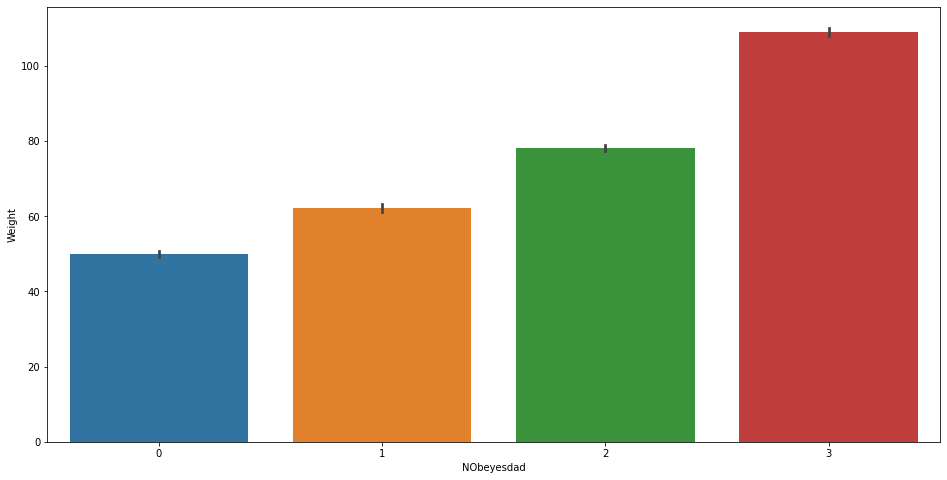

In [41]:
#basic plots : How do various attributes vary with the obesity levels
#shows the ditribution of our data (mostly obese)

order = list(np.sort(df['NObeyesdad'].unique()))
print(order)

plt.figure(figsize=(16,8))
sns.barplot(x='NObeyesdad', y='Weight',
           data=df,
           order=order)

In [42]:
level_means = df.groupby('NObeyesdad').mean()
level_means.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
NObeyesdad,,,,,,,,,,,,,,,,
0,0.363971,19.761029,1.690809,49.906985,0.463235,0.812500,1.514706,2.191176,1.448529,0.003676,0.860294,0.080882,1.246324,0.841912,0.573529,2.514706
1,0.508711,21.738676,1.677352,62.155052,0.540070,0.724739,1.334495,1.839721,1.498258,0.045296,0.850174,0.104530,1.247387,0.675958,0.696864,2.585366
2,0.572414,25.200000,1.694483,78.176552,0.829310,0.834483,1.268966,1.577586,1.017241,0.013793,1.044828,0.070690,1.015517,0.650000,0.753448,2.187931
3,0.505144,25.824074,1.715226,109.081687,0.991770,0.980453,1.516461,1.721193,1.022634,0.022634,1.088477,0.003086,0.863169,0.620370,0.772634,2.360082


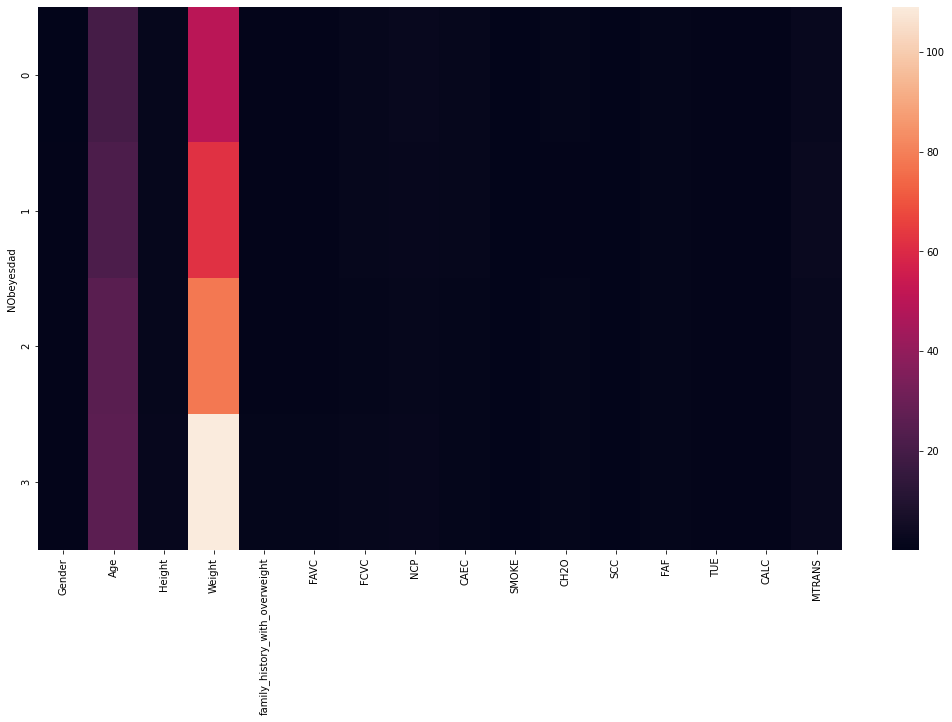

In [43]:
#Shows we need to scale the data
plt.figure(figsize=(18, 10))
sns.heatmap(level_means)

<h1>Data Preparation<h1>

In [55]:
#Averge feature values, shows there needs to be scaling
round(df.drop('NObeyesdad', axis = 1).mean(), 2)

Gender                             0.51
Age                               24.32
Height                             1.70
Weight                            86.59
family_history_with_overweight     0.82
FAVC                               0.88
FCVC                               1.42
NCP                                1.76
CAEC                               1.14
SMOKE                              0.02
CH2O                               1.01
SCC                                0.05
FAF                                1.01
TUE                                0.66
CALC                               0.73
MTRANS                             2.36
dtype: float64

In [56]:
#Assign X (data) and y (target)
data = df.drop('NObeyesdad', axis = 1)
target = df['NObeyesdad']

In [57]:
#Scaling the features
#Scale function standardises each column
from sklearn.preprocessing import scale   
data = scale(data)

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.25, random_state = 42)

In [58]:
#Confirm that splitting also has similar distribution of each obesity level
print(y_train.mean())
print(y_test.mean())

2.0675931775110548
2.0643939393939394


<h1>Model Building<h1>

Building 2 models (linear & non linear)

In [59]:
#Linear model & fit
model_linear = SVC(kernel = 'linear')
model_linear.fit(X_train, y_train)

#Predict
y_pred = model_linear.predict(X_test)

<h1>Model Evaluation Metrics<h1>

In [60]:
#Evaluate the model using confustion matrix
from sklearn import metrics
metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[ 67,   1,   0,   0],
       [ 11,  61,   6,   0],
       [  0,   3, 127,   4],
       [  0,   0,   1, 247]], dtype=int64)

In [69]:
#Print other metrics
print('Accuracy :', metrics.accuracy_score(y_test, y_pred))
print('Precision Score :',metrics.precision_score(y_test, y_pred, average='weighted'))
print('Recall Score :',metrics.recall_score(y_test, y_pred, average='weighted'))

Accuracy : 0.884469696969697
Precision Score : 0.8841230829055504
Recall Score : 0.884469696969697


In [70]:
#F1 Score
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted') 

0.8838969287340345

In [71]:
#Non_linear_model
#using rbf kernel, C=a, default value of gamma


#Model 
non_linear_model = SVC(kernel='rbf')

#Fit
non_linear_model.fit(X_train, y_train)

#Predict
y_pred = non_linear_model.predict(X_test)

In [72]:
#Print other metrics
print('Accuracy :', metrics.accuracy_score(y_test, y_pred))
print('Precision Score :',metrics.precision_score(y_test, y_pred, average='weighted'))
print('Recall Score :',metrics.recall_score(y_test, y_pred, average='weighted'))

Accuracy : 0.884469696969697
Precision Score : 0.8841230829055504
Recall Score : 0.884469696969697


<h1>Hyperparameter Tuning<h1>

Now, we have multiple hyperparameters to optimise \
The chose of kernal (liner, rbf, etc)\
C\
gamma\
We will use the GridSearchCV() method to tune the hyperparameters\

<h1>Grid Search to find Optimal Hyperparameter<h1>

In [73]:
#Does not touch the testing dataset, getting accuracy for each fold and averging the results
#Creating a KFold object with 5 splits
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

#Specify range of hyperparameters
#Set the parameters by corss-validation
hyper_params = [{
    'gamma' : [1e-2, 1e-3, 1e-4],
    'C' : [1,10,100,1000]
}]

#specify model
model = SVC(kernel = 'rbf')

#Set up GridSearchCV()
model_cv = GridSearchCV(estimator = model,
                       param_grid = hyper_params,
                       scoring = 'accuracy',
                       cv = folds,
                       verbose = 1,
                       return_train_score = True)

#Fit the model - it will fit 5 folds across all values of C
model_cv.fit(X_train, y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    3.8s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [74]:
#Results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.036508,0.002728,0.006983,0.000006,1,0.01,"{'C': 1, 'gamma': 0.01}",0.854890,0.876972,0.880126,...,0.867967,0.011072,7,0.878357,0.887046,0.887836,0.890292,0.895817,0.887869,0.005660
1,0.048023,0.000610,0.008431,0.000497,1,0.001,"{'C': 1, 'gamma': 0.001}",0.618297,0.640379,0.618297,...,0.632356,0.012976,11,0.662717,0.623223,0.627962,0.641673,0.647987,0.640713,0.014188
2,0.054782,0.001694,0.008408,0.000503,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.463722,0.438486,0.488959,...,0.457347,0.017797,12,0.455766,0.462085,0.449447,0.460142,0.459353,0.457359,0.004454
3,0.028523,0.001025,0.005096,0.000888,10,0.01,"{'C': 10, 'gamma': 0.01}",0.943218,0.955836,0.924290,...,0.938086,0.011429,4,0.973934,0.971564,0.977093,0.971586,0.970008,0.972837,0.002470
4,0.033990,0.001498,0.006412,0.000512,10,0.001,"{'C': 10, 'gamma': 0.001}",0.839117,0.858044,0.858044,...,0.850914,0.007602,8,0.867299,0.871248,0.868088,0.869771,0.881610,0.871603,0.005187
5,0.052072,0.002672,0.008991,0.000626,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.627760,0.640379,0.624606,...,0.638675,0.011279,10,0.665087,0.624803,0.635071,0.647198,0.650355,0.644503,0.013728
6,0.027125,0.000743,0.002986,0.000012,100,0.01,"{'C': 100, 'gamma': 0.01}",0.940063,0.946372,0.952681,...,0.946304,0.007210,2,0.996051,0.995261,0.995261,0.997632,0.996054,0.996052,0.000866
7,0.026931,0.000630,0.004378,0.000476,100,0.001,"{'C': 100, 'gamma': 0.001}",0.930599,0.940063,0.902208,...,0.926093,0.013005,5,0.943128,0.944708,0.955766,0.947119,0.951855,0.948515,0.004673
8,0.036889,0.001908,0.006814,0.000389,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.823344,0.858044,0.848580,...,0.843968,0.011547,9,0.860190,0.860979,0.857030,0.865825,0.877664,0.864338,0.007234
9,0.028725,0.000743,0.002612,0.000503,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.943218,0.936909,0.952681,...,0.943777,0.009469,3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


To get a better sense of how training and test accuracy varies with C, let's plot the tranining and test accuracies againt C.

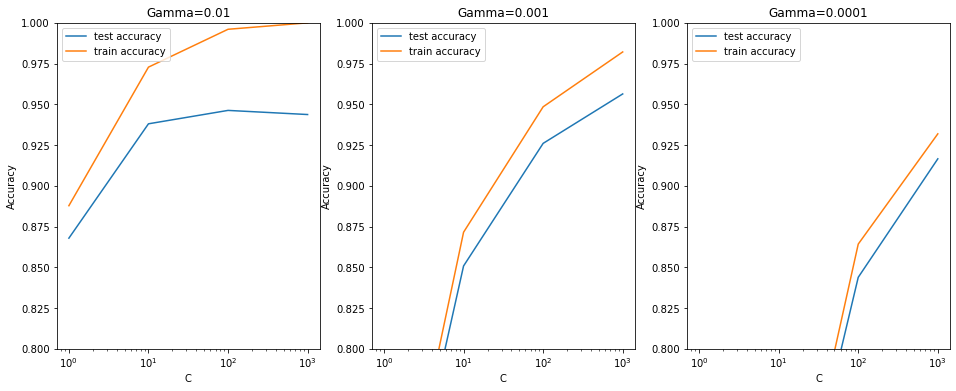

In [75]:
#Converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

#Plotting
plt.figure(figsize=(16,6))

#Subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]


plt.plot(gamma_01['param_C'], gamma_01['mean_test_score'])
plt.plot(gamma_01['param_C'], gamma_01['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Gamma=0.01')
plt.ylim([0.80,1])
plt.legend(['test accuracy', 'train accuracy'], loc = 'upper left')
plt.xscale('log')

#Subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]


plt.plot(gamma_001['param_C'], gamma_001['mean_test_score'])
plt.plot(gamma_001['param_C'], gamma_001['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Gamma=0.001')
plt.ylim([0.80,1])
plt.legend(['test accuracy', 'train accuracy'], loc = 'upper left')
plt.xscale('log')

#Subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]


plt.plot(gamma_0001['param_C'], gamma_0001['mean_test_score'])
plt.plot(gamma_0001['param_C'], gamma_0001['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Gamma=0.0001')
plt.ylim([0.80,1])
plt.legend(['test accuracy', 'train accuracy'], loc = 'upper left')
plt.xscale('log')

In [76]:
#Specify optimal hyperparameters
best_params = {'C':1000, 'gamma': 0.001, 'kernel':'rbf'}

#Model
model = SVC(C=1000, gamma=0.001, kernel='rbf')

model.fit(X_train, y_train)
y_pred = model.predict(X_test)



#Print other metrics
print(metrics.confusion_matrix(y_test, y_pred), '\n')
print('Accuracy :', metrics.accuracy_score(y_test, y_pred))
print('Precision Score :',metrics.precision_score(y_test, y_pred, average='weighted'))
print('Recall Score :',metrics.recall_score(y_test, y_pred, average='weighted'))

[[ 65   3   0   0]
 [  3  69   6   0]
 [  0   3 128   3]
 [  0   0   3 245]] 

Accuracy : 0.9602272727272727
Precision Score : 0.9601459854014598
Recall Score : 0.9602272727272727


In [84]:
#Now lookin at the optimal C values found by GridSearchCV
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']
print('The highest test accuracy is {0} at C = {1}'.format(best_score, best_C))

The highest test accuracy is 0.9564089765603162 at C = 1000


In [85]:
#Creating the model with the best value of C
model = SVC(C=best_C)

#fit
model.fit(X_train, y_train)

#predict
y_pred = model .predict(X_test)

In [86]:
#print other metrics

#accuracy
print('Accuracy :', metrics.accuracy_score(y_test, y_pred))
print('Precision Score :',metrics.precision_score(y_test, y_pred, average='weighted'))
print('Recall Score :',metrics.recall_score(y_test, y_pred, average='weighted'))

Accuracy : 0.9128787878787878
Precision Score : 0.9147460999264846
Recall Score : 0.9128787878787878
